### Import Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from  sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from  sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')


### Import dataset

In [9]:
data_resume = pd.read_csv('Dataset/Cleaned_Resumes.csv')
data_resume

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal murali experience summ...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,seeking suitable positions workday hcm techno ...
76,Workday,workday hcm fcm name role kumar workday consul...
77,Workday,venkateswarlu workday consultant professional ...


### Data Preprocessing

#### LabelEndoder

In [10]:
from sklearn.preprocessing import LabelEncoder
Endoder = LabelEncoder()
data_resume['LabelEncoding'] = Endoder.fit_transform(data_resume['Category'])
data_resume

,Category,Resume_Details,LabelEncoding
0,PeopleSoft,anubhav kumar singh work globally competitive ...,0
1,PeopleSoft,ananda rayudu profile summary years experience...,0
2,PeopleSoft,peoplesoft database administrator gangareddy p...,0
3,PeopleSoft,classification internal murali experience summ...,0
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,0
...,...,...,...
74,Workday,workday integration consultant name sri krishn...,3
75,Workday,seeking suitable positions workday hcm techno ...,3
76,Workday,workday hcm fcm name role kumar workday consul...,3
77,Workday,venkateswarlu workday consultant professional ...,3


In [11]:
data_resume.isnull().sum()

Category          0
Resume_Details    0
LabelEncoding     0
dtype: int64

### Model Building

#### Train - Test Split

In [22]:
x = data_resume['Resume_Details'].values
y = data_resume['Category'].values

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 45, test_size= 0.25, stratify= y)
x_train.shape, x_test.shape

((59,), (20,))

#### TF-IDF Vectorization

In [24]:
tfid_vector = TfidfVectorizer(smooth_idf= True, stop_words='english')

In [25]:
x_train = tfid_vector.fit_transform(x_train)
x_test = tfid_vector.transform(x_test)

x_train.shape, x_test.shape

((59, 3798), (20, 3798))

In [26]:
print(y_train)

['PeopleSoft' 'React JS Developer' 'PeopleSoft' 'Workday' 'SQL Developer'
 'SQL Developer' 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'PeopleSoft' 'React JS Developer' 'SQL Developer' 'React JS Developer'
 'React JS Developer' 'Workday' 'React JS Developer' 'SQL Developer'
 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'React JS Developer' 'Workday' 'PeopleSoft' 'PeopleSoft' 'PeopleSoft'
 'SQL Developer' 'Workday' 'Workday' 'Workday' 'React JS Developer'
 'Workday' 'React JS Developer' 'SQL Developer' 'Workday'
 'React JS Developer' 'Workday' 'SQL Developer' 'Workday' 'PeopleSoft'
 'PeopleSoft' 'SQL Developer' 'PeopleSoft' 'Workday' 'SQL Developer'
 'PeopleSoft' 'Workday' 'PeopleSoft' 'SQL Developer' 'Workday' 'Workday'
 'Workday' 'PeopleSoft' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'React JS Developer' 'Workday']


###  Classification Models

#### KNN Classifier

In [31]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Accuracy on training set: {model_knn.score(x_train, y_train)}')
print(f'Accuracy on test set: {model_knn.score(x_test, y_test)}')
print("Classification report for classifier %s:\n%s\n" %  (model_knn, classification_report( y_test, y_pred)))

nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test, y_pred, average= 'macro'), 2)
recall_knn = round(recall_score(y_test, y_pred, average= 'macro'), 2)
fi_knn = round(f1_score(y_test, y_pred, average= 'macro'), 2)
accuracy_knn = round(accuracy_score(y_test, y_pred), 2)

Accuracy on training set: 0.7796610169491526
Accuracy on test set: 0.8
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                    precision    recall  f1-score   support

        PeopleSoft       0.71      1.00      0.83         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       0.00      0.00      0.00         4
           Workday       0.71      1.00      0.83         5

          accuracy                           0.80        20
         macro avg       0.61      0.75      0.67        20
      weighted avg       0.66      0.80      0.72        20




#### Decision Tree Classifier

In [32]:
model_Dt = DecisionTreeClassifier(criterion='gini')
model_Dt.fit(x_train, y_train)
y_pred = model_Dt.predict(x_test)
accuracy_Dt = accuracy_score(y_test, y_pred)
print(f'Accuracy on training set: {model_Dt.score(x_train, y_train)}')
print(f'Accuracy on test set: {model_Dt.score(x_test, y_test)}')
print("Classification report for classifier %s:\n%s\n" %  (model_Dt, classification_report( y_test, y_pred)))

nb_score = model_Dt.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Dt = round(precision_score(y_test, y_pred, average= 'macro'), 2)
recall_Dt = round(recall_score(y_test, y_pred, average= 'macro'), 2)
fi_Dt = round(f1_score(y_test, y_pred, average= 'macro'), 2)
accuracy_Dt = round(accuracy_score(y_test, y_pred), 2)

Accuracy on training set: 1.0
Accuracy on test set: 1.0
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




#### Random Forest Classifier

In [33]:
model_RF = RandomForestClassifier(n_estimators= 200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print(f'Accuracy on training set: {model_RF.score(x_train, y_train)}')
print(f'Accuracy on test set: {model_RF.score(x_test, y_test)}')
print("Classification report for classifier %s:\n%s\n" %  (model_RF, classification_report( y_test, y_pred)))

nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_RF = round(precision_score(y_test, y_pred, average= 'macro'), 2)
recall_RF = round(recall_score(y_test, y_pred, average= 'macro'), 2)
fi_RF = round(f1_score(y_test, y_pred, average= 'macro'), 2)
accuracy_RF = round(accuracy_score(y_test, y_pred), 2)

Accuracy on training set: 1.0
Accuracy on test set: 0.95
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.80      0.89         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.96      0.95      0.95        20
      weighted avg       0.96      0.95      0.95        20




#### Support Vectore Machine (SVM) Classifier

In [34]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'Accuracy on training set: {model_svm.score(x_train, y_train)}')
print(f'Accuracy on test set: {model_svm.score(x_test, y_test)}')
print("Classification report for classifier %s:\n%s\n" %  (model_svm, classification_report( y_test, y_pred)))

nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test, y_pred, average= 'macro'), 2)
recall_svm = round(recall_score(y_test, y_pred, average= 'macro'), 2)
fi_svm = round(f1_score(y_test, y_pred, average= 'macro'), 2)
accuracy_svm = round(accuracy_score(y_test, y_pred), 2)

Accuracy on training set: 1.0
Accuracy on test set: 0.9
Classification report for classifier SVC():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.80      0.89         5
React JS Developer       0.75      1.00      0.86         6
     SQL Developer       1.00      0.75      0.86         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.90        20
         macro avg       0.94      0.89      0.90        20
      weighted avg       0.93      0.90      0.90        20




#### Logistic Regression

In [35]:
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)
y_pred = model_LR.predict(x_test)
accuracy_LR = accuracy_score(y_test, y_pred)
print(f'Accuracy on training set: {model_LR.score(x_train, y_train)}')
print(f'Accuracy on test set: {model_LR.score(x_test, y_test)}')
print("Classification report for classifier %s:\n%s\n" %  (model_LR, classification_report( y_test, y_pred)))

nb_score = model_LR.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_LR = round(precision_score(y_test, y_pred, average= 'macro'), 2)
recall_LR = round(recall_score(y_test, y_pred, average= 'macro'), 2)
fi_LR = round(f1_score(y_test, y_pred, average= 'macro'), 2)
accuracy_LR = round(accuracy_score(y_test, y_pred), 2)

Accuracy on training set: 1.0
Accuracy on test set: 0.95
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.80      0.89         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.96      0.95      0.95        20
      weighted avg       0.96      0.95      0.95        20




#### Bagging Classifier

In [36]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples= 0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print(f'Accuracy on training set: {model_bagg.score(x_train, y_train)}')
print(f'Accuracy on test set: {model_bagg.score(x_test, y_test)}')
print("Classification report for classifier %s:\n%s\n" %  (model_bagg, classification_report( y_test, y_pred)))

nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test, y_pred, average= 'macro'), 2)
recall_bagg = round(recall_score(y_test, y_pred, average= 'macro'), 2)
fi_bagg = round(f1_score(y_test, y_pred, average= 'macro'), 2)
accuracy_bagg = round(accuracy_score(y_test, y_pred), 2)

Accuracy on training set: 0.9152542372881356
Accuracy on test set: 0.95
Classification report for classifier BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                    precision    recall  f1-score   support

        PeopleSoft       0.83      1.00      0.91         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      0.75      0.86         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.96      0.94      0.94        20
      weighted avg       0.96      0.95      0.95        20




#### AdaBoost Classifier

In [37]:
model_ada = AdaBoostClassifier(n_estimators=100)
model_ada.fit(x_train, y_train)
y_pred = model_ada.predict(x_test)
accuracy_ada = accuracy_score(y_test, y_pred)
print(f'Accuracy on training set: {model_ada.score(x_train, y_train)}')
print(f'Accuracy on test set: {model_ada.score(x_test, y_test)}')
print("Classification report for classifier %s:\n%s\n" %  (model_ada, classification_report( y_test, y_pred)))

nb_score = model_ada.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_ada = round(precision_score(y_test, y_pred, average= 'macro'), 2)
recall_ada = round(recall_score(y_test, y_pred, average= 'macro'), 2)
f1_ada = round(f1_score(y_test, y_pred, average= 'macro'), 2)
accuracy_ada = round(accuracy_score(y_test, y_pred), 2)

Accuracy on training set: 0.7457627118644068
Accuracy on test set: 0.75
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                    precision    recall  f1-score   support

        PeopleSoft       0.00      0.00      0.00         5
React JS Developer       0.55      1.00      0.71         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.75        20
         macro avg       0.64      0.75      0.68        20
      weighted avg       0.61      0.75      0.66        20




#### Gradient Boosting Classifier

In [38]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100, learning_rate= 1.0, max_depth= 1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print(f'Accuracy on training set: {model_GradientBoost.score(x_train, y_train)}')
print(f'Accuracy on test set: {model_GradientBoost.score(x_test, y_test)}')
print("Classification report for classifier %s:\n%s\n" %  (model_GradientBoost, classification_report( y_test, y_pred)))

nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_GradientBoost = round(precision_score(y_test, y_pred, average= 'macro'), 2)
recall_GradientBoost = round(recall_score(y_test, y_pred, average= 'macro'), 2)
f1_GradientBoost = round(f1_score(y_test, y_pred, average= 'macro'), 2)
accuracy_GradientBoost = round(accuracy_score(y_test, y_pred), 2)

Accuracy on training set: 1.0
Accuracy on test set: 0.95
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.80      0.89         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.96      0.95      0.95        20
      weighted avg       0.96      0.95      0.95        20




#### Naive Bayes Classifier

In [43]:
model_NB = MultinomialNB(alpha= 1, fit_prior= False, class_prior= None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print(f'Accuracy on training set: {model_NB.score(x_train, y_train)}')
print(f'Accuracy on test set: {model_NB.score(x_test, y_test)}')
print("Classification report for classifier %s:\n%s\n" %  (model_NB, classification_report( y_test, y_pred)))

nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test, y_pred, average= 'macro'), 2)
recall_NB = round(recall_score(y_test, y_pred, average= 'macro'), 2)
f1_NB = round(f1_score(y_test, y_pred, average= 'macro'), 2)
accuracy_NB = round(accuracy_score(y_test, y_pred), 2)

Accuracy on training set: 1.0
Accuracy on test set: 1.0
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




###  Model Evaluation

In [40]:
Evaluation = {"Models":["KNN Classifier", "DecisionTree Clasifier", "RandomForest Classifier", "SVM Classifier",
                        "Logistic Regresion", "Bagging Classifier", " AdaBoost Classifier", "Gradient Boosting Classifier", "Naive Bayes Classifier"],\
             "Train_Accuracy(%)": [model_knn.score(x_train, y_train), model_Dt.score(x_train, y_train), model_RF.score(x_train, y_train), model_svm.score(x_train, y_train), model_LR.score(x_train, y_train), 
                                  model_bagg.score(x_train, y_train), model_ada.score(x_train, y_train), model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)], 
             "Test_Accuracy(%)": [accuracy_knn, accuracy_Dt, accuracy_RF, accuracy_svm, accuracy_LR, accuracy_bagg, accuracy_ada, accuracy_GradientBoost, accuracy_NB],\
             "Precision(%)": [precision_knn, precision_Dt, precision_RF, precision_svm, precision_LR, precision_bagg, precision_ada, precision_GradientBoost, precision_NB],\
             "Recall(%)": [recall_knn, recall_Dt, recall_RF, recall_svm, recall_LR, recall_bagg, recall_ada, recall_GradientBoost,recall_NB],\
             "F1-Score(%)": [fi_knn, fi_Dt, fi_RF, fi_svm, fi_LR, fi_bagg, f1_ada, f1_GradientBoost, f1_NB]}

table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.779661,0.95,0.61,0.75,0.67
1,DecisionTree Clasifier,1.000000,1.00,1.00,1.00,1.00
2,RandomForest Classifier,1.000000,0.95,0.96,0.95,0.95
3,SVM Classifier,1.000000,0.90,0.94,0.89,0.90
4,Logistic Regresion,1.000000,0.95,0.96,0.95,0.95
5,Bagging Classifier,0.915254,0.95,0.96,0.94,0.94
6,AdaBoost Classifier,0.745763,0.95,0.64,0.75,0.68
7,Gradient Boosting Classifier,1.000000,0.95,0.96,0.95,0.95
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00


In [44]:
model_names = ["KNN", "DecisionTree", "RandomForest", "SVM","Logistic Regresion",
               "Bagging", " AdaBoost", "Gradient Boosting", "Naive Bayes"]

Test_Accuracy = [accuracy_knn * 100, accuracy_Dt * 100, accuracy_RF * 100,
                 accuracy_svm * 100, accuracy_LR * 100, accuracy_bagg * 100,
                 accuracy_ada * 100, accuracy_GradientBoost * 100, accuracy_NB * 100]

Train_Accuracy = [model_knn.score(x_train, y_train)* 100, model_Dt.score(x_train, y_train)* 100,
                  model_RF.score(x_train, y_train)* 100, model_svm.score(x_train, y_train)* 100,
                  model_LR.score(x_train, y_train)* 100, model_bagg.score(x_train, y_train)* 100,
                  model_ada.score(x_train, y_train)* 100, model_GradientBoost.score(x_train, y_train)* 100,
                  model_NB.score(x_train, y_train)* 100]
            

### Train and Test Accuracy Plot

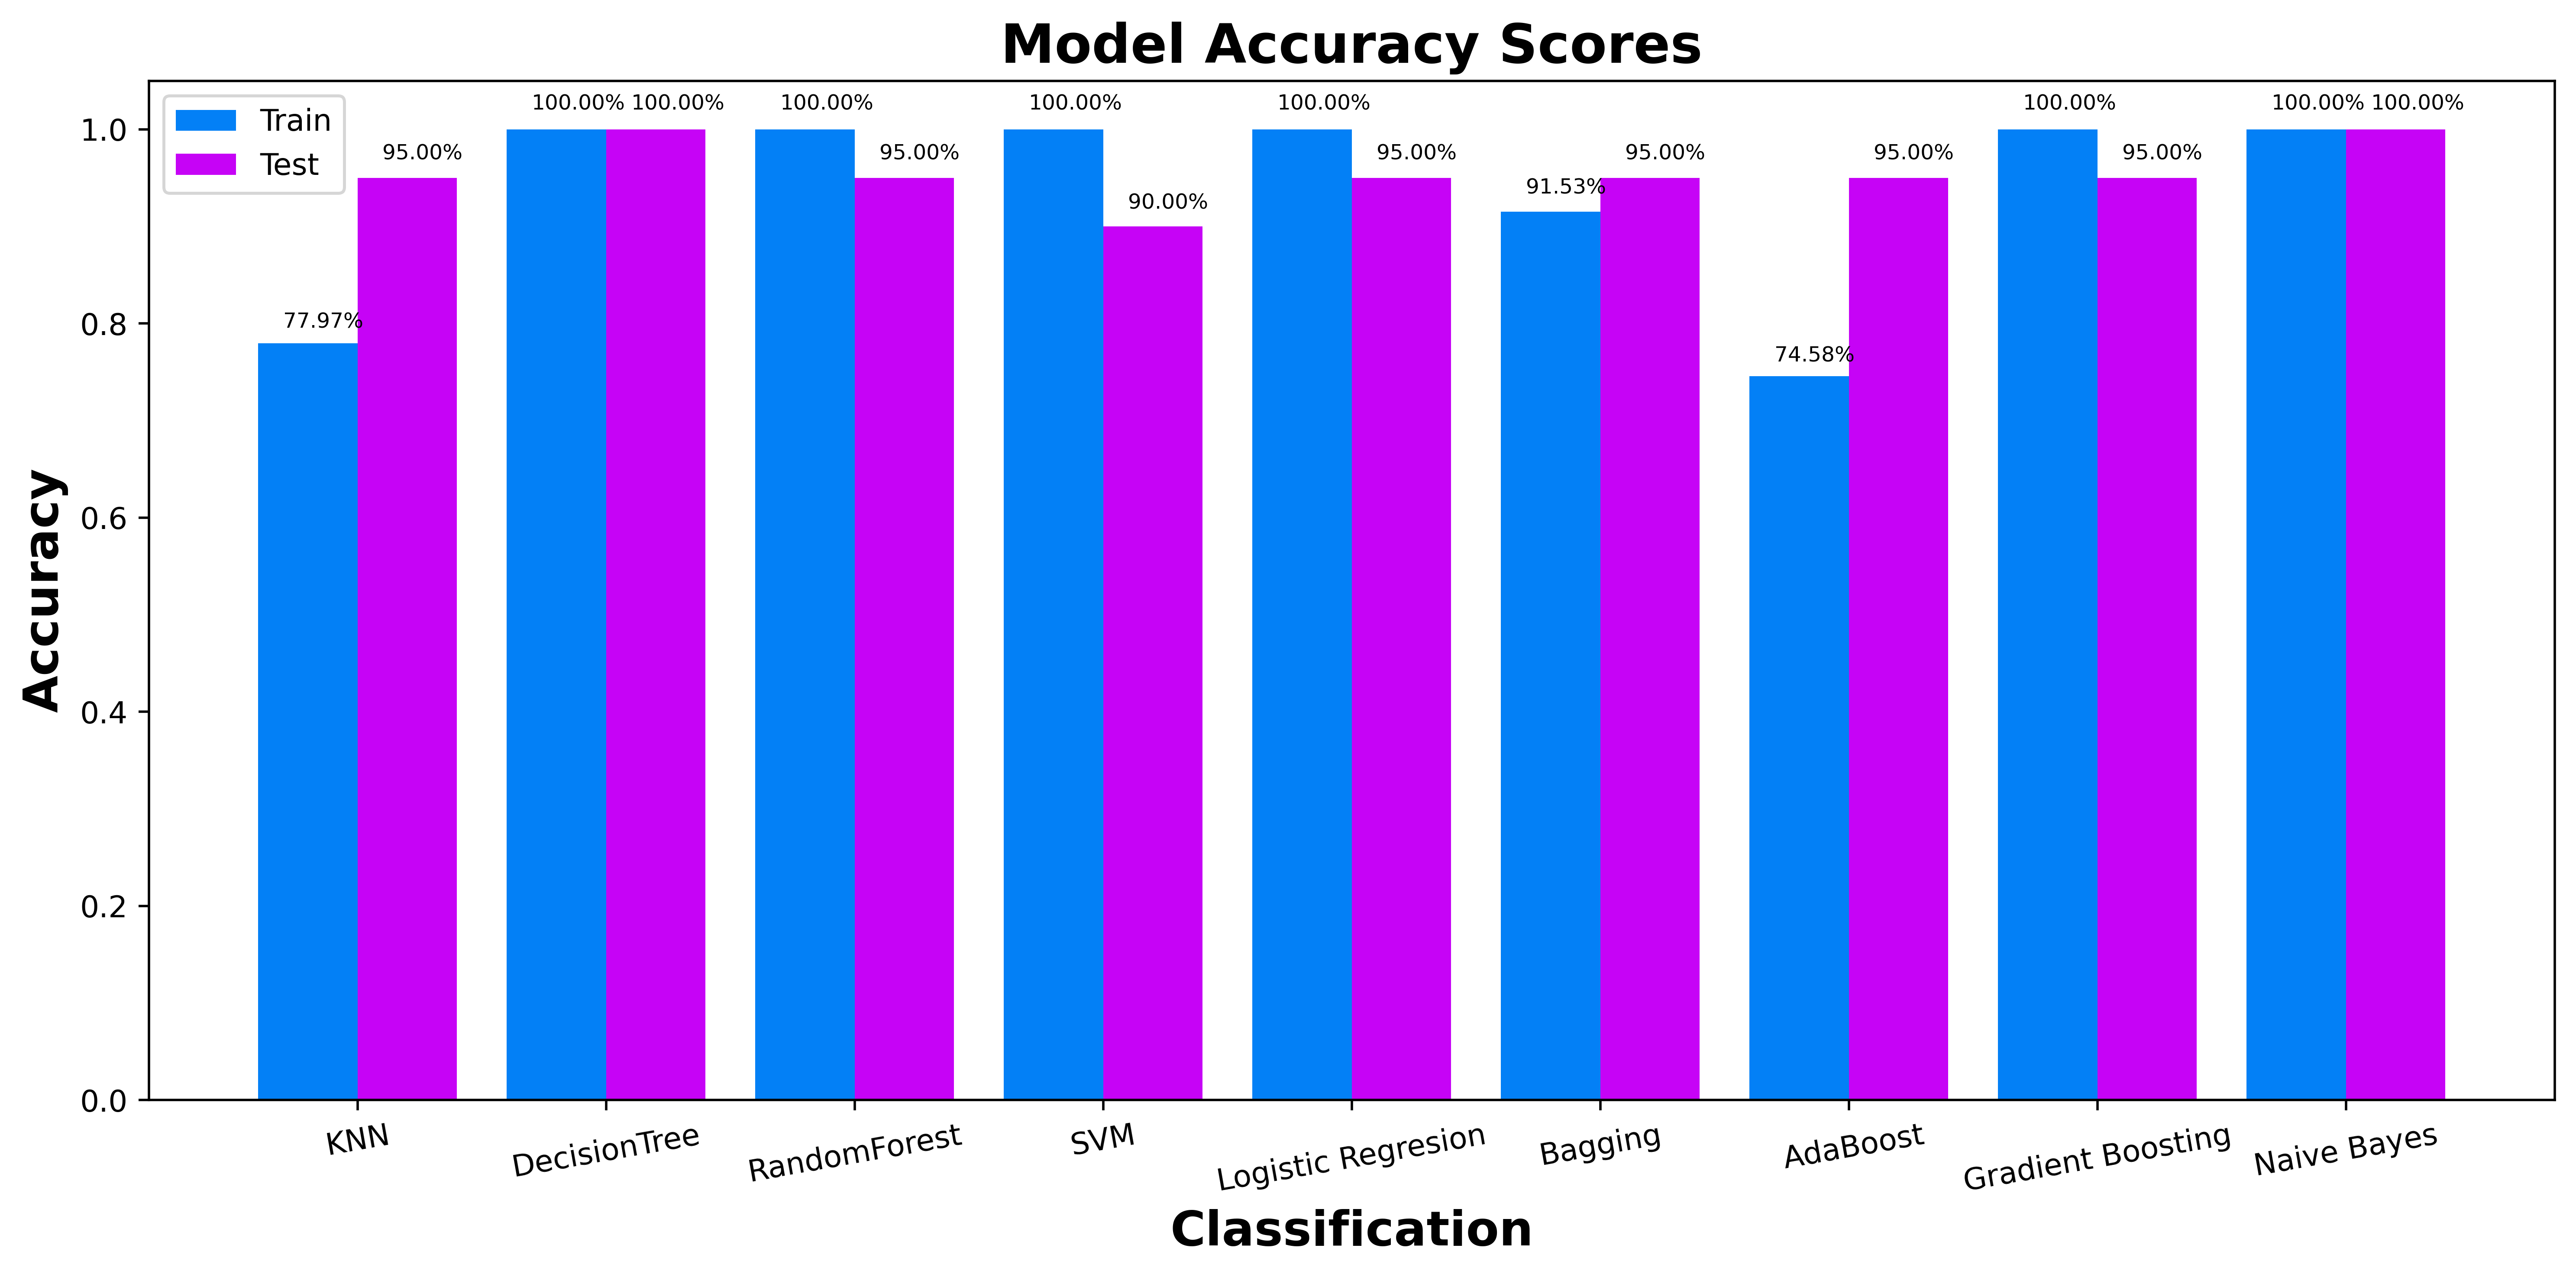

In [49]:
fig, axe = plt.subplots(1, 1, figsize= (12, 6), dpi = 500)
x_pos = np.arange(len(table))

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label = 'Train', color = '#0380F6')
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label = 'Test', color = '#C603F6')
plt.xticks(x_pos, model_names)

plt.xlabel("Classification", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i,bar in enumerate(bar1):
    plt.text(bar.get_x() + + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_Accuracy[i]), fontsize = 7)
    
for i,bar in enumerate(bar2):
    plt.text(bar.get_x() + + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_Accuracy[i]), fontsize = 7)
    
fig.tight_layout()
plt.show()